<a href="https://colab.research.google.com/github/RupeshSharma14/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# **To be named**

In [1]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

In [2]:
! pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.figsize'] = (30, 20)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Loading the dataset

bank_df = pd.read_csv("/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/bank-full.csv", sep = ";")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank_df.shape

(45211, 17)

In [9]:
# Checking for the null values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Checking for duplicate rows in the dataset

bank_df.duplicated().sum()

0

In [11]:
# Basic statistics about the dataset

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
bank_df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

**Outliers are present in the data**


will drop pdays, previous

In [13]:
# Checking the data types of columns

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [14]:
# Renaming few columns for better understanding

bank_df.rename(columns = {"job": "job_type", "marital": "marital_status", "housing": "housing_loan", "loan": "personal_loan",
                            "contact": "contact_type","campaign": "contact_campaign", "day": "last_date", "month": "last_month",
                            "pdays": "prev_campaign_gap", "previous": "before_campaign_contact","poutcome": "prev_outcome",
                            "y": "subscribed"}, inplace = True)
bank_df.columns

Index(['age', 'job_type', 'marital_status', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'contact_type', 'last_date',
       'last_month', 'duration', 'contact_campaign', 'prev_campaign_gap',
       'before_campaign_contact', 'prev_outcome', 'subscribed'],
      dtype='object')

In [15]:
numeric_cols =  bank_df.describe().columns
numeric_cols

Index(['age', 'balance', 'last_date', 'duration', 'contact_campaign',
       'prev_campaign_gap', 'before_campaign_contact'],
      dtype='object')

In [16]:
categorical_cols = bank_df.describe(include = "O").columns
categorical_cols

Index(['job_type', 'marital_status', 'education', 'default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_month', 'prev_outcome',
       'subscribed'],
      dtype='object')

In [17]:
for cat in categorical_cols:
  print(f"{cat} - {bank_df[cat].unique()}")

job_type - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital_status - ['married' 'single' 'divorced']
education - ['tertiary' 'secondary' 'unknown' 'primary']
default - ['no' 'yes']
housing_loan - ['yes' 'no']
personal_loan - ['no' 'yes']
contact_type - ['unknown' 'cellular' 'telephone']
last_month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome - ['unknown' 'failure' 'other' 'success']
subscribed - ['no' 'yes']


# **Exploratory Data Analysis**

## **Univariate Analysis**

**1. Dependent variable**

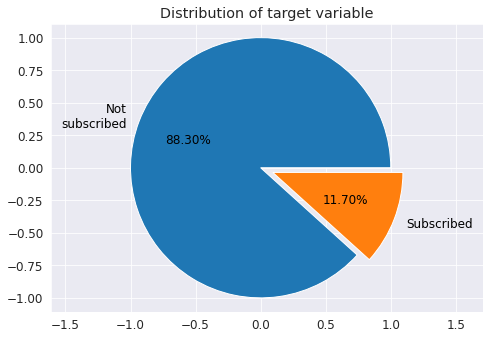

In [18]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.pie(bank_df["subscribed"].value_counts(), labels = ["Not\nsubscribed", "Subscribed"],
        explode = (0, 0.1), autopct = "%1.2f%%", frame = True, textprops = dict(color = "black", size = 12))

ax.axis("equal")
plt.title("Distribution of target variable")

plt.show()

**2. Numerical variables**

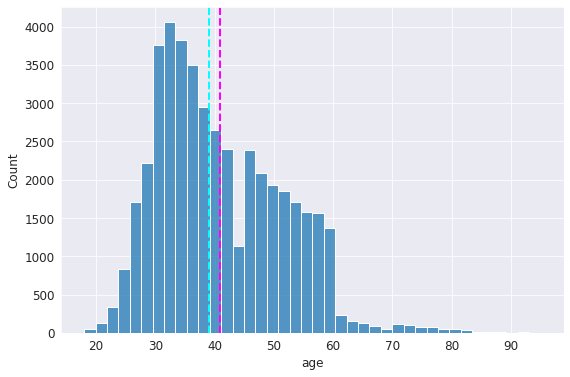

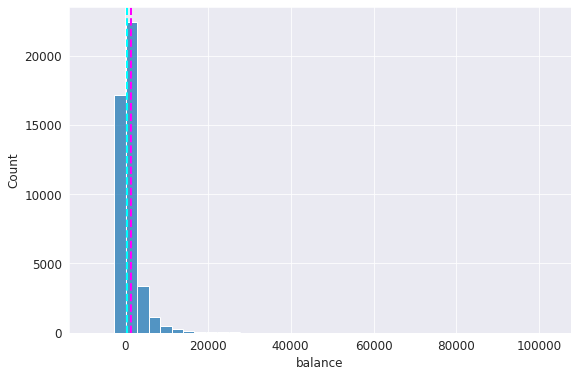

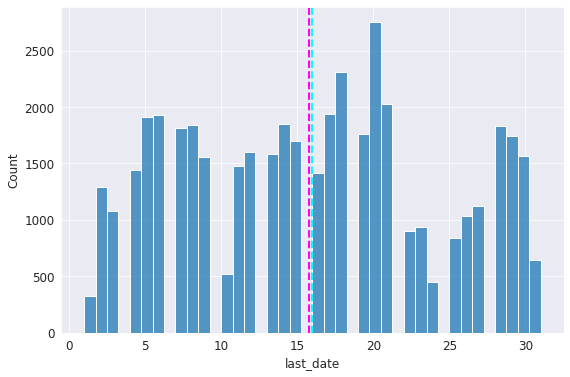

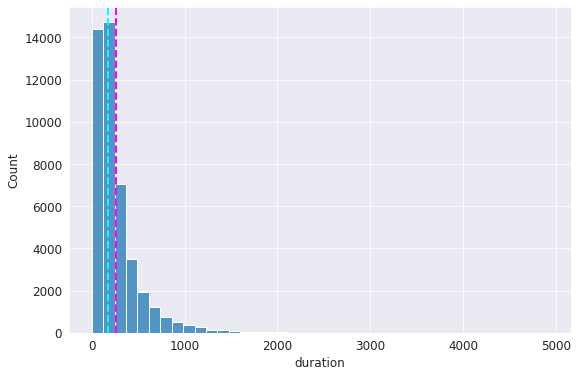

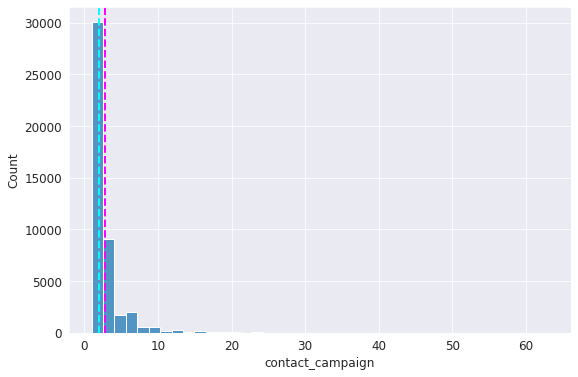

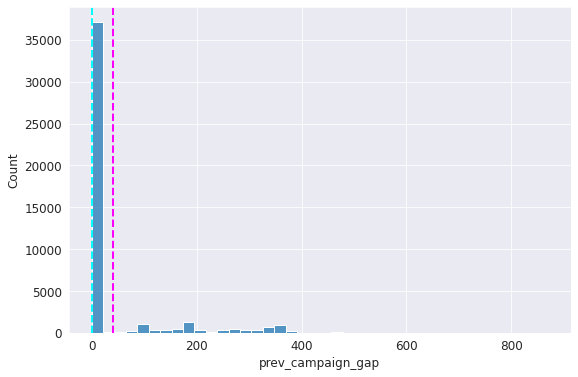

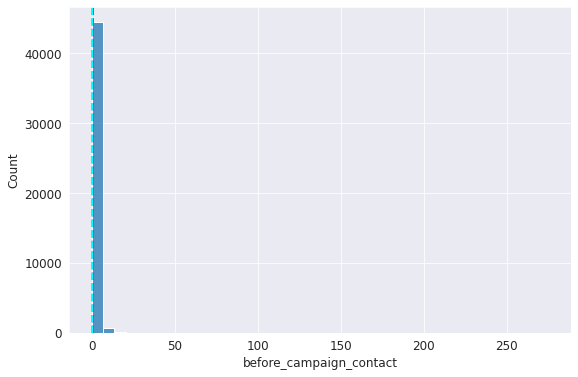

In [19]:
# Distribution of numeric_features

for col in numeric_cols:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bank_df[col]
  sns.histplot(feature, ax = ax, bins = 40)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  # ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

The above histograms shows that the datapoints are skewed, so more robust machine learning algorithms like ensemble methods will perform well as compared to other algorithms

**3. Categorical variables**

In [20]:
categorical_cols

Index(['job_type', 'marital_status', 'education', 'default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_month', 'prev_outcome',
       'subscribed'],
      dtype='object')

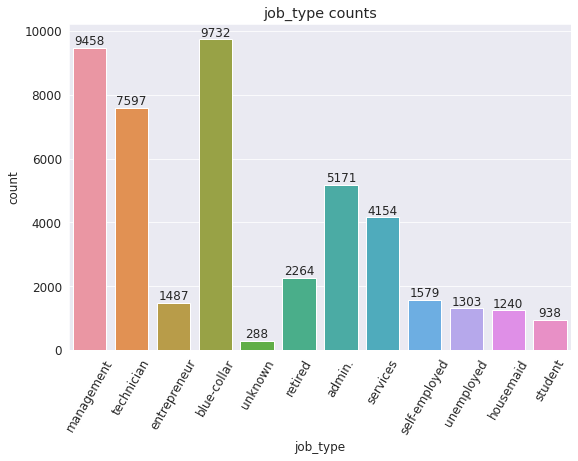

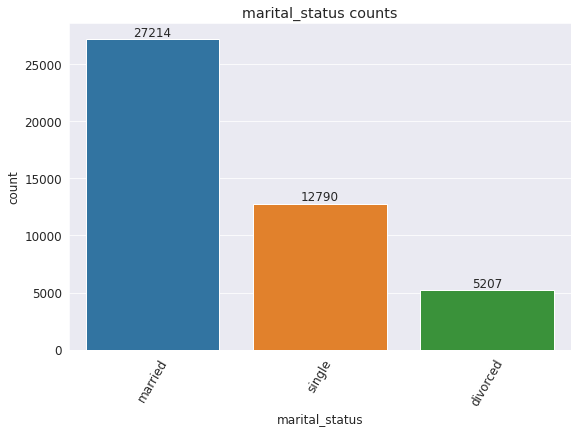

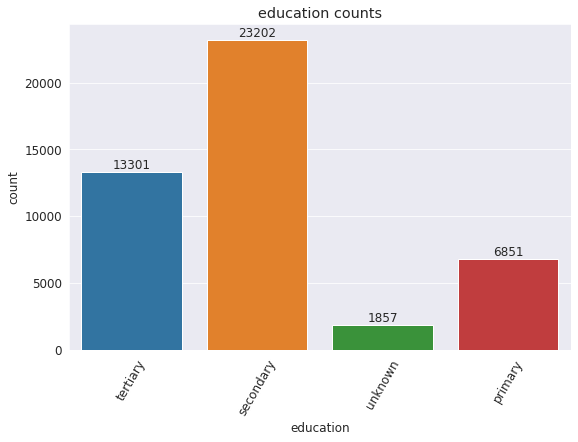

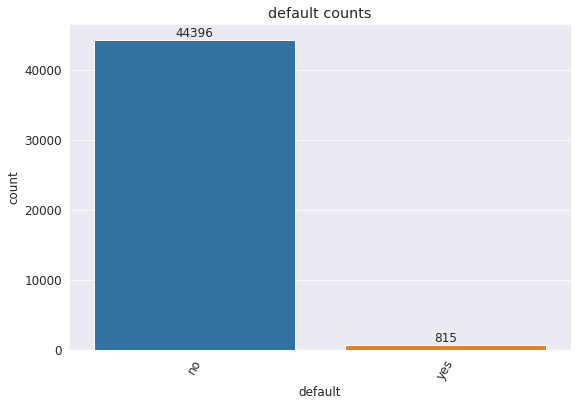

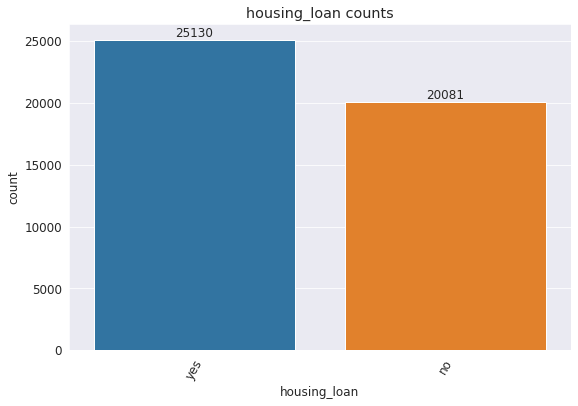

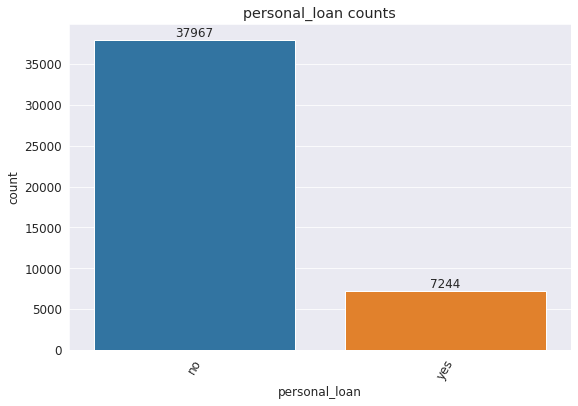

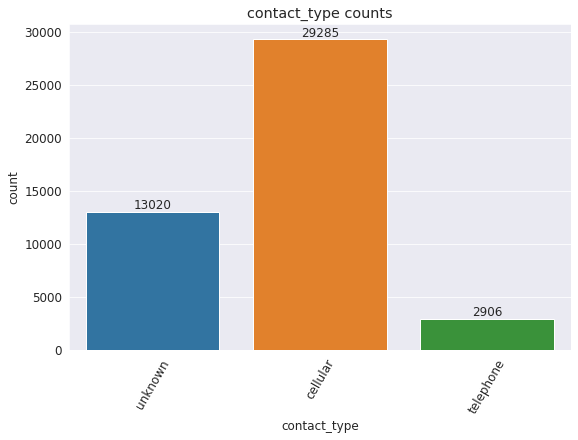

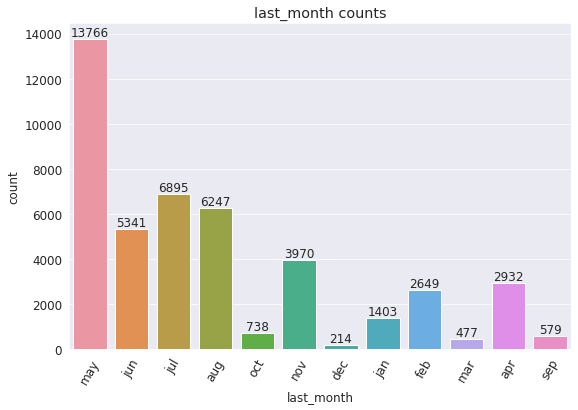

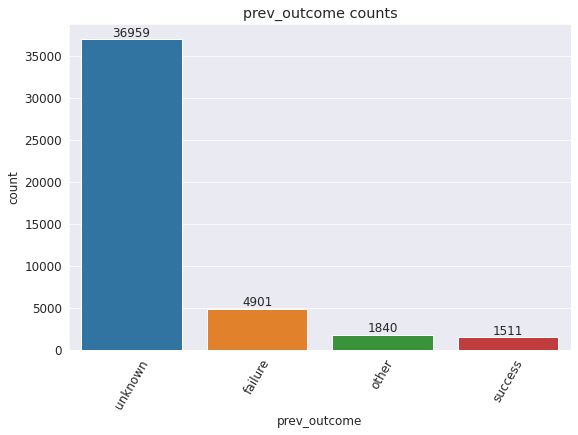

In [21]:
for col in categorical_cols[: -1]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bank_df[col]
  ax = sns.countplot(x = feature)
  for container in ax.containers:
    ax.bar_label(container, label_type = "edge")
    
  plt.xticks(rotation = 60)
  ax.set_title(col + " counts")

plt.show()

## **Bivariate Analysis**

**1. Numerical variables vs Dependent variable**

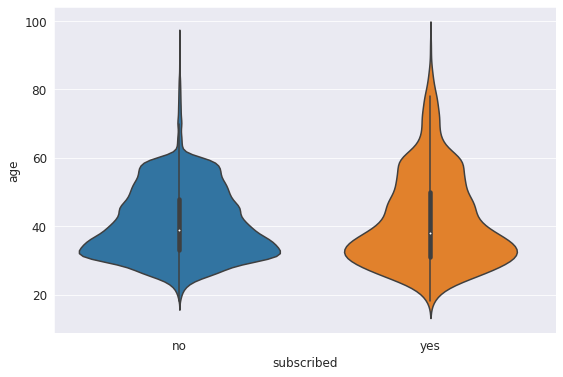

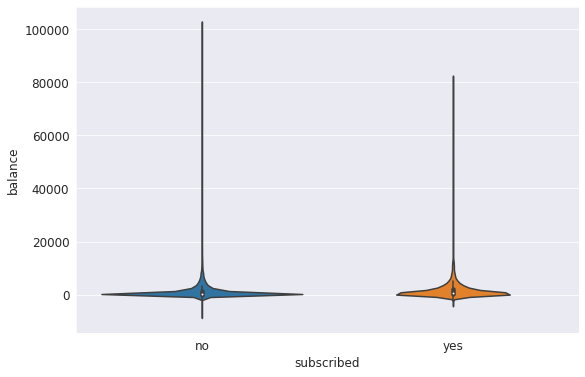

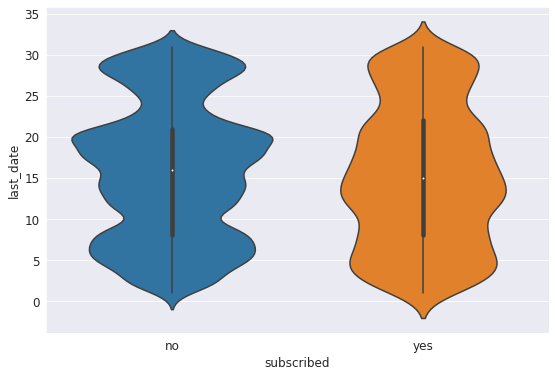

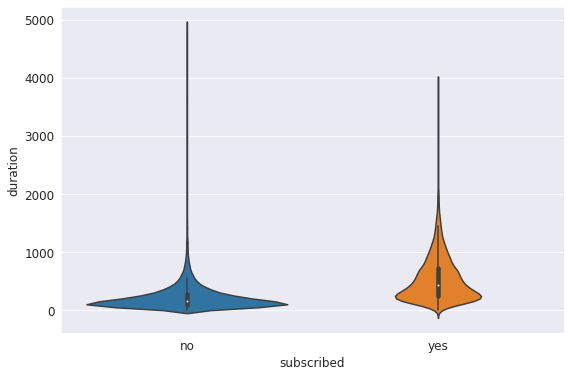

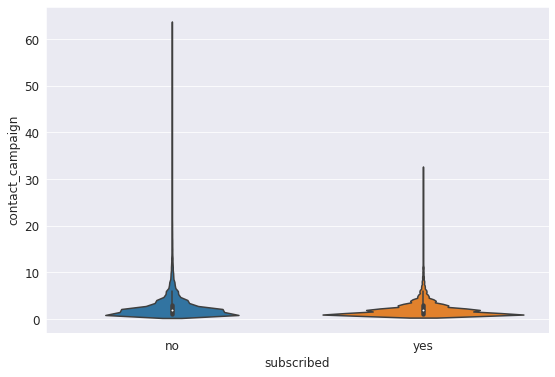

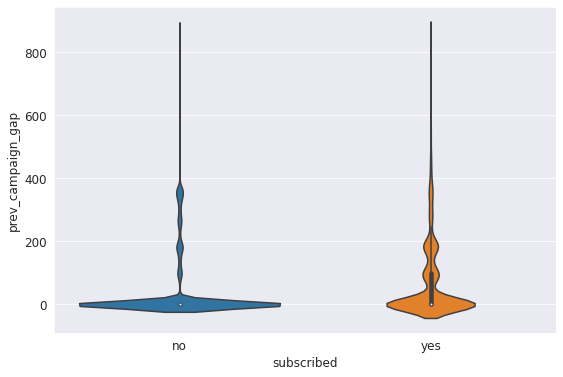

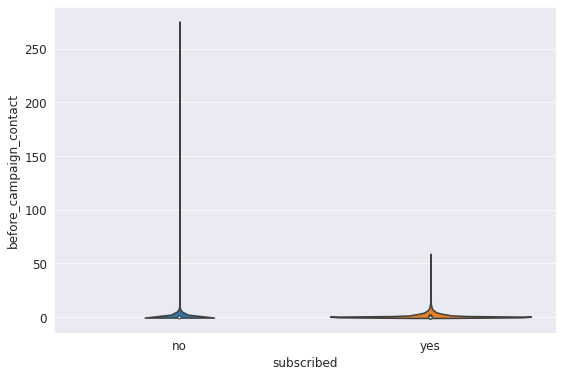

In [22]:
for col in numeric_cols:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bank_df[col]
  label = bank_df["subscribed"]
  sns.violinplot(x = label, y = feature)

plt.show()

**2. Categorical variables and Dependent variable**

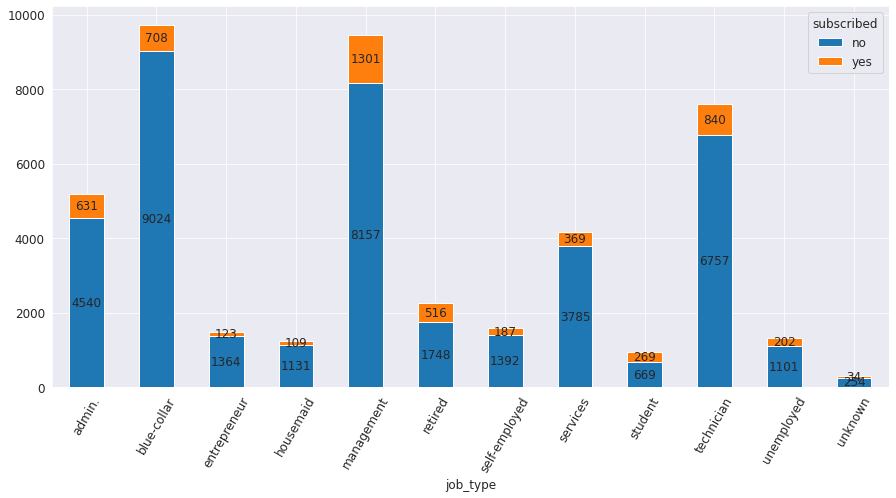

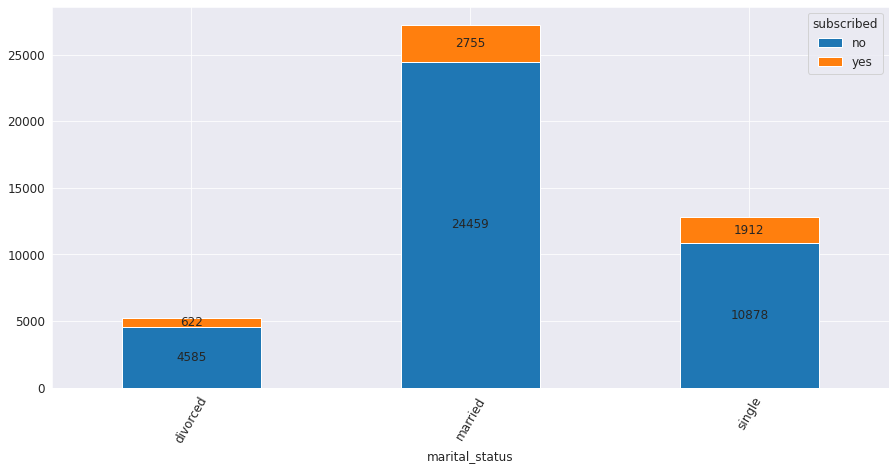

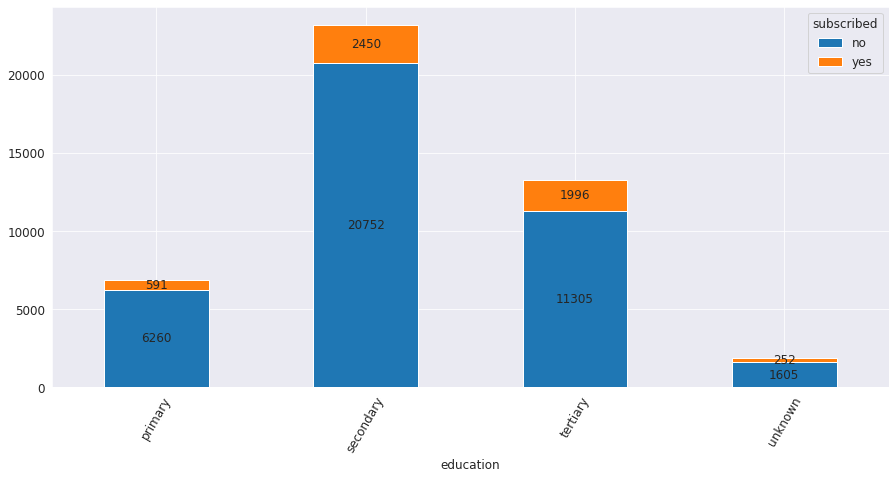

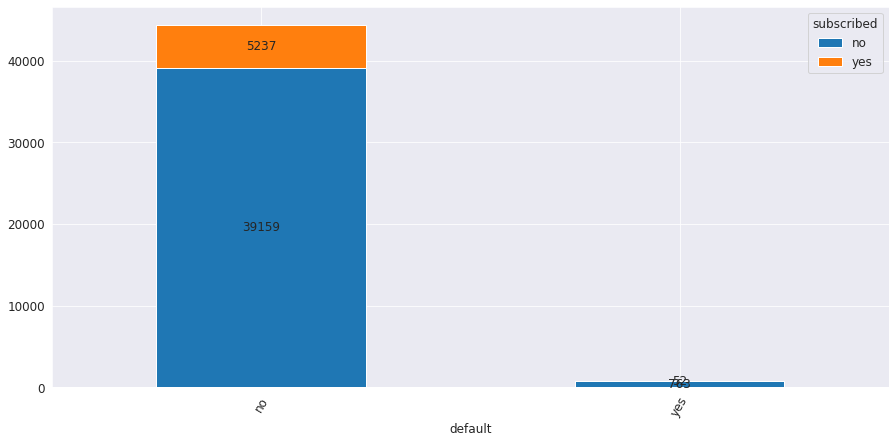

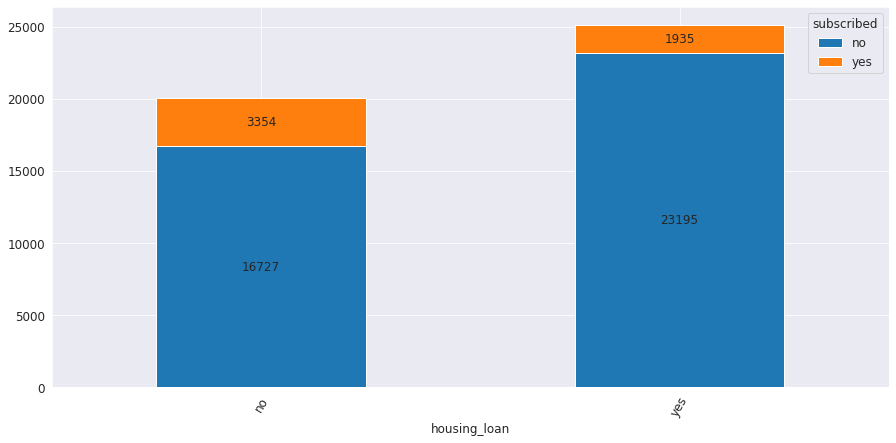

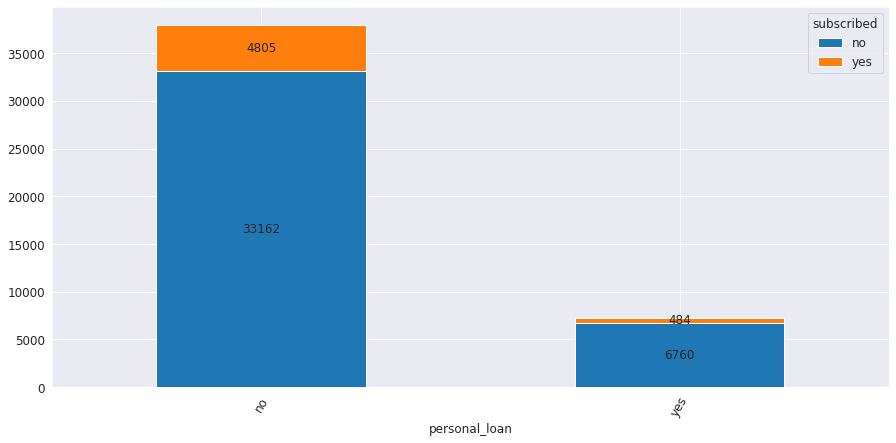

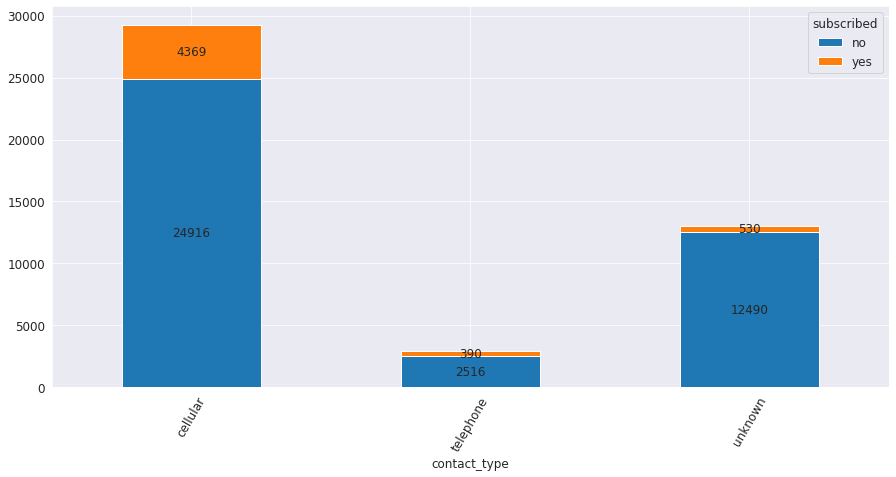

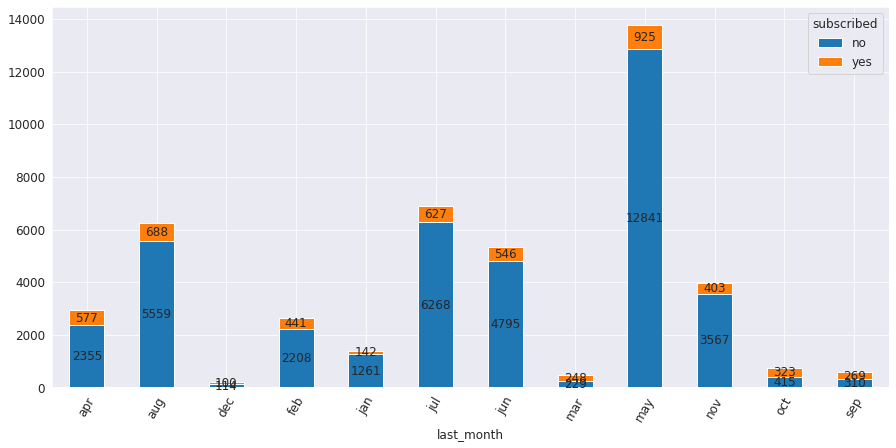

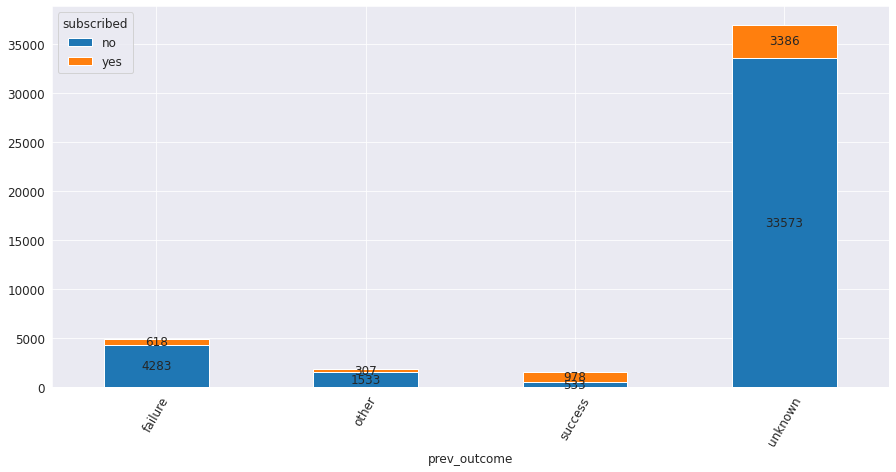

In [23]:
for col in categorical_cols[: -1]:
  fig = plt.figure(figsize = (15, 7))
  ax = fig.gca()
  feature = bank_df[col]
  label = bank_df["subscribed"]

  crosstab = pd.crosstab(feature, label)
  stacked_plot = crosstab.plot(kind = "bar", ax = ax, stacked = True)
  for container in stacked_plot.containers:
    stacked_plot.bar_label(container, label_type = "center")

  plt.xticks(rotation = 60)
plt.show()

## **Multivariate Analysis**

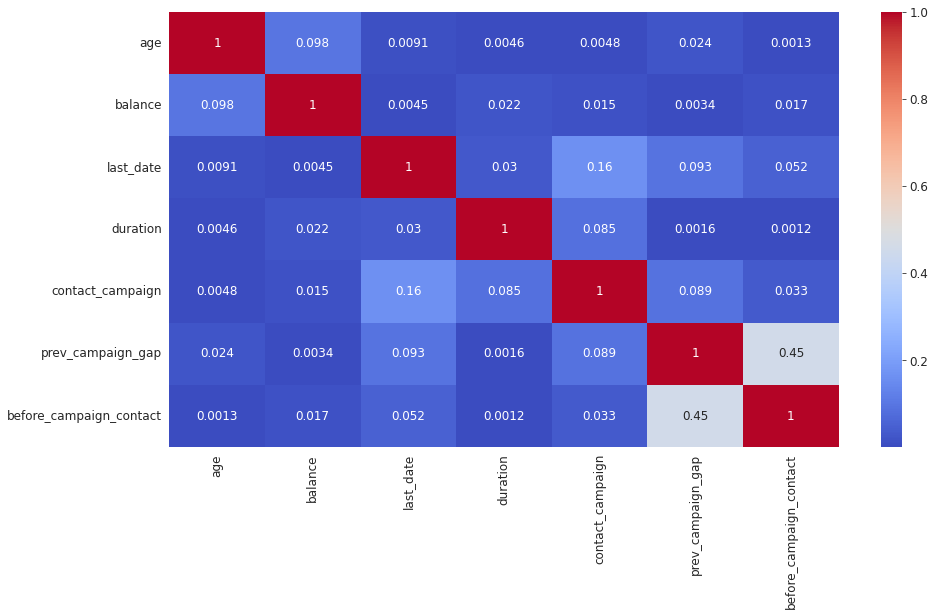

In [24]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bank_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

plt.show()

# **Data Preparation**

In [25]:
# def age_group(x):
#     if x <= 35:
#         x = "Young Adults"
#     elif (x >= 36) & (x <= 55):
#         x = "Middle-Aged Adults"
#     else:
#         x = "Old-Aged Adults "
#     return x

In [26]:
# def balance_group(x):
#     if x <= 0:
#         x = "No Balance"
#     elif (x > 0) & (x <= 300):
#         x = "Low Balance"
#     elif (x > 300) & (x <= 1000):
#         x = "Average Balane"
#     else:
#         x = "High Balance"
    
#     return x

In [27]:
def loan(x):
    if x is True:
        x = "yes"
    else:
        x = "no"
    return x

In [28]:
# bank_df["age_group"] = bank_df["age"].apply(age_group)
# bank_df["balance_group"] = bank_df["balance"].apply(balance_group)
bank_df["loan"] = (bank_df["housing_loan"] == "yes") | (bank_df["personal_loan"] == "yes")
bank_df["loan"] = bank_df["loan"].apply(loan)

# index = np.where(bank_df["contact_campaign"] >= 5)
# bank_df["contact_campaign"].iloc[index] = 5
# bank_df["contact_campaign"].astype("O")

In [29]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
education_dict = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}

bank_df["last_month"] = bank_df["last_month"].map(month_dict)
bank_df["education"] = bank_df["education"].map(education_dict)

In [30]:
def target_encoding(df, features, dep_col):
  for feature in features:
    enc_df = pd.crosstab(df[feature], df[dep_col], normalize = "index")["yes"]
    return enc_df.values

In [31]:
bank_df.drop(columns = ["duration", "housing_loan", "personal_loan", "prev_campaign_gap", "before_campaign_contact"], inplace = True)
bank_df

,age,job_type,marital_status,education,default,balance,contact_type,last_date,last_month,contact_campaign,prev_outcome,subscribed,loan
0,58,management,married,3,no,2143,unknown,5,5,1,unknown,no,yes
1,44,technician,single,2,no,29,unknown,5,5,1,unknown,no,yes
2,33,entrepreneur,married,2,no,2,unknown,5,5,1,unknown,no,yes
3,47,blue-collar,married,0,no,1506,unknown,5,5,1,unknown,no,yes
4,33,unknown,single,0,no,1,unknown,5,5,1,unknown,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,cellular,17,11,3,unknown,yes,no
45207,71,retired,divorced,1,no,1729,cellular,17,11,2,unknown,yes,no
45208,72,retired,married,2,no,5715,cellular,17,11,5,success,yes,no
45209,57,blue-collar,married,2,no,668,telephone,17,11,4,unknown,no,no


### **Splitting the dataset**

In [32]:
# Random Sampling

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_df, test_size = 0.2, random_state = 42)

In [33]:
# subscription_labels = train_set["subscribed"].copy()
# subscription_features = train_set.drop("subscribed", axis = 1)

In [34]:
ohe_cols = ["marital_status", "default", "loan", "contact_type", "prev_outcome"]
te_cols = ["job_type", "education", "last_month", "last_date", "contact_campaign"]
scaling_cols = ["age", "balance", "job_type", "education", "last_month", "last_date", "contact_campaign"]

In [35]:
def target_encoding(feature, dep_col):
  enc_df = pd.crosstab(feature, dep_col, normalize = "index")["yes"]
  return enc_df.index, enc_df.values

In [36]:
for feature in te_cols:
  index, value = target_encoding(train_set[feature], train_set["subscribed"])
  mapping_dict = dict(zip(index, value))
  train_set[feature] = train_set[feature].map(mapping_dict)

In [37]:
train_set

,age,job_type,marital_status,education,default,balance,contact_type,last_date,last_month,contact_campaign,prev_outcome,subscribed,loan
3344,41,0.072252,married,0.086377,no,849,unknown,0.143377,0.065219,0.143314,unknown,no,yes
17965,49,0.108760,married,0.086377,no,1415,cellular,0.176935,0.091927,0.112155,unknown,no,yes
18299,42,0.119894,married,0.105303,no,3842,cellular,0.077821,0.091927,0.090876,unknown,no,no
10221,37,0.135467,single,0.148970,no,-119,unknown,0.125322,0.098888,0.075949,unknown,no,yes
32192,56,0.072252,married,0.086377,no,3498,cellular,0.143377,0.202645,0.112155,unknown,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0.093812,single,0.086377,no,1059,unknown,0.100271,0.098888,0.143314,unknown,yes,no
44732,23,0.278976,single,0.148970,no,508,cellular,0.110274,0.465517,0.143314,failure,no,no
38158,34,0.108760,divorced,0.148970,no,1317,cellular,0.143377,0.065219,0.143314,unknown,no,yes
860,33,0.222590,married,0.105303,no,165,unknown,0.086124,0.065219,0.143314,unknown,no,no


In [38]:
subscription_labels = train_set["subscribed"].copy()
subscription_features = train_set.drop("subscribed", axis = 1)

In [39]:
# Labeling the target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_prepared = le.fit_transform(subscription_labels)

In [40]:
''' Using Column Transformer to create a pipeline to use StandardScaler to perform feature scaling on num features and also
converting categorical features into numerical features using OneHot Encoder'''

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import TargetEncoder

features_pipeline = ColumnTransformer([
                                       ("scaling", StandardScaler(), scaling_cols),
                                       ("ohe", OneHotEncoder(), ohe_cols),
                                      #  ("te", TargetEncoder(), te_cols)
])

data_prepared = features_pipeline.fit_transform(subscription_features)

**Feature Selection**

In [41]:
# from scipy import stats

In [42]:
# def chi2_test(df, categorical_features, dep_col):
#   features, chi2_scores, p_values = [], [], []
#   chi2_df = pd.DataFrame()

#   for feature in categorical_features:
#     chi2_score, p_value, _, __ = stats.chi2_contingency(pd.crosstab(df[feature], bank_df[dep_col]))
#     chi2_scores.append(chi2_score)
#     p_values.append(p_value)

#   chi2_df["features"] = categorical_features
#   chi2_df["chi2_score"] = chi2_scores
#   chi2_df["p-value"] = p_values

#   return chi2_df

In [43]:
# chi2_test(train_set, train_set.describe(include = "O").columns, dep_col = "subscribed").sort_values(by = "p-value", ascending = False)

In [44]:
# bank_df["balance"] = np.log10(bank_df["balance"] + 0.01)
# bank_df["contact_campaign"] = np.log10(bank_df["contact_campaign"] + 0.01)

In [45]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit_transform(train_set[train_set.describe().columns])

In [46]:
# from sklearn.linear_model import LogisticRegression

# reg = LogisticRegression(penalty = "l1", solver = "saga", class_weight = "balanced")
# reg.fit(train_set[train_set.describe().columns], label_prepared)

In [47]:
# train_set.describe().columns

In [48]:
# reg.coef_

In [49]:
# sel_features = ['age', 'balance', 'last_date', 'contact_campaign', "marital_status", "education", "job_type", "contact_type", "loan"]

In [50]:
# features = train_set.describe(include = "all").columns
# features

In [51]:
# subscription_labels = train_set["subscribed"].copy()
# subscription_features = train_set[sel_features] #.drop("subscribed", axis = 1)

In [52]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class DataTransformer(BaseEstimator, TransformerMixin):
  
#   def __init__(self):
#     pass

#   def fit(self, X, y = None):
#     return self
  
#   def transform(self, X, y = None):
#     features = X.describe().columns
#     for feature in features:

#       if  -0.5 <= X[feature].skew() <= 0.5:       # Symmetrical Distribution
#         pass

#       elif -1 <= X[feature].skew() < -0.5:         # Moderately negative skewed distribution
#         X[feature] = np.sqrt(np.max(X[feature] + 1) - X[feature])
      
#       elif 0.5 < X[feature].skew() <= 1:           # Moderately positive skewed distribution
#         X[feature] = np.sqrt(X[feature])

#       elif X[feature].skew() > 1:                 # Highly positive skewed distribution
#         X[feature] = np.log10(X[feature] + 0.01)

#       else:                                       # Highly negative skewed distribution
#         X[feature] = np.log10(max(X[feature] + 1) - X[feature])
    
#     return X

In [53]:
# num_cols = subscription_features.describe().columns
# cat_cols = subscription_features.describe(include = "O").columns

In [54]:
# # Labeling the target variable

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# label_prepared = le.fit_transform(subscription_labels)

In [55]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# data_prepared = ohe.fit_transform(subscription_features)

In [56]:
# data_prepared.shape

In [57]:
# from sklearn.pipeline import Pipeline


# num_pipeline = Pipeline([("minmax_scaler", MinMaxScaler())
#                          ])     

# subscription_features_num = num_pipeline.fit_transform(subscription_features[num_cols])                 

In [58]:
# from sklearn.preprocessing import OneHotEncoder

# cat_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_cols)
#                          ])   

# subscription_features_cat = cat_pipeline.fit_transform(subscription_features[cat_cols])  

In [59]:
# ''' Using Column Transformer to create a pipeline to use StandardScaler to perform feature scaling on num features and also
# converting categorical features into numerical features using OneHot Encoder'''

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# num_cols = subscription_features.describe().columns
# cat_cols = subscription_features.describe(include = "O").columns

# features_pipeline = ColumnTransformer([
#                                        ("minmax_scaler", MinMaxScaler(), num_cols),
#                                        ("cat", OneHotEncoder(), cat_cols)
# ])

# data_prepared = features_pipeline.fit_transform(subscription_features)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(data_prepared, label_prepared)

ExtraTreesClassifier()

In [61]:
# plt.figure(figsize = (8,6))
# feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
# feature_importances.nlargest(X.shape[1]).plot(kind = 'barh')
# plt.show()

In [63]:
imp_features_forest = selection.feature_importances_
cat_encoder = features_pipeline.named_transformers_["ohe"]

cat_attribs = cat_encoder.categories_
attributes_forest = []
attributes_forest.extend(scaling_cols)
for var in cat_attribs:
  attributes_forest.extend(var)

attributes_forest

importance_dict = {"features": attributes_forest, "importance": np.around(imp_features_forest, 2)}
forest_importance = pd.DataFrame(importance_dict).sort_values(by = "importance", ascending = False)

# forest_importance.nlargest(8)

In [64]:
sel_features = ["balance", "age", "last_date", "last_month", "job_type", "contact_campaign", "prev_outcome", "education"]

In [65]:
data_prepared = data_prepared[:, forest_importance.index[0:8]]

In [66]:
data_prepared.shape

(36168, 8)

In [67]:
from imblearn.combine import SMOTETomek
from collections import Counter

counter = Counter(label_prepared)
print(counter)

tl = SMOTETomek(sampling_strategy = "minority")

data_prepared, label_prepared = tl.fit_resample(data_prepared, label_prepared)

counter = Counter(label_prepared)
print(counter)

Counter({0: 31970, 1: 4198})
Counter({0: 31370, 1: 31370})


In [68]:
# from imblearn.under_sampling import TomekLinks

# tl = TomekLinks(ratio='majority')

# X_tl, y_tl = tl.fit_sample(data.iloc[:,0:-1], data['Target'])

# print('Original dataset shape:', len(data))
# print('Resampled dataset shape', len(y_tl))

In [69]:
# Using SMOTE technique to balance the dataset

# from collections import Counter
# from imblearn.over_sampling import SMOTE

# counter = Counter(label_prepared)
# print(counter)

# smote = SMOTE()
# data_prepared, label_prepared = smote.fit_resample(data_prepared, label_prepared)

# counter = Counter(label_prepared)
# print(counter)

**Statistical test**

**Modeling**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

from sklearn.model_selection import learning_curve
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [71]:
def fit_models(models_dict, data_prepared, label_prepared):

  train_models = dict()
  for model in models_dict:
    train_models[model] = models_dict[model].fit(data_prepared, label_prepared)

  return train_models

In [72]:
def evaluate_models(models_dict, data_prepared, label_prepared, cross_val = False):
  
  scores_dict = dict()

  if cross_val:

    for model in models_dict:
        model_scores = cross_val_score(models_dict[model], data_prepared, 
                                      label_prepared, scoring = make_scorer(f1_score), cv = 10)
        scores_dict[model] = np.mean(model_scores)

  else:

    for model in models_dict:
      label_pred = models_dict[model].predict(data_prepared)
      scores_dict[model] = f1_score(label_prepared, label_pred) 

  return scores_dict

In [73]:
def plot_learning_curves(models_dict, data_prepared, label_prepared):

  for model in models_dict:
    train_sizes, train_scores, test_scores = learning_curve(models_dict[model],
                                                            data_prepared, label_prepared, n_jobs = -1, scoring = make_scorer(f1_score), cv = 10, verbose = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

    ax.set_title(model)
    plt.legend(loc="best")
    plt.ylim()
  plt.show()

In [74]:
# Model training

models_dict = {"LR": LogisticRegression(), "KNN": KNeighborsClassifier(),
               "DT": DecisionTreeClassifier(), "RF": RandomForestClassifier(),
               "ABR": AdaBoostClassifier(), "GBR": GradientBoostingClassifier()}
               
trained_models = fit_models(models_dict, data_prepared, label_prepared)

In [75]:
# Model evaluation on train-set

train_set_perf = evaluate_models(models_dict, data_prepared, label_prepared)
train_set_perf = pd.DataFrame(train_set_perf.items(), columns = ["models", "score"], index = range(1,7))
train_set_perf

,models,score
1,LR,0.631262
2,KNN,0.915350
3,DT,0.999920
4,RF,0.999920
5,ABR,0.810587
6,GBR,0.873863


In [76]:
# # Model evaluation on cross validation 

# val_set_perf = evaluate_models(models_dict, data_prepared, label_prepared, cross_val = True)
# val_set_perf = pd.DataFrame(val_set_perf.items(), columns = ["models", "score"], index = range(1,7))
# val_set_perf

In [77]:
for feature in te_cols:
  index, value = target_encoding(test_set[feature], test_set["subscribed"])
  mapping_dict = dict(zip(index, value))
  test_set[feature] = test_set[feature].map(mapping_dict)

In [78]:
y_test = test_set["subscribed"].copy()
X_test = test_set.drop("subscribed", axis = 1)

X_test_prepared = features_pipeline.transform(X_test)
y_test_prepared = le.transform(y_test)
X_test_prepared = X_test_prepared[:, forest_importance.index[0:8]]

In [79]:
# Model evaluation on test-set

test_set_perf = evaluate_models(models_dict, X_test_prepared, y_test_prepared)
test_set_perf = pd.DataFrame(test_set_perf.items(), columns = ["models", "score"], index = range(1,7))
test_set_perf

,models,score
1,LR,0.353838
2,KNN,0.287231
3,DT,0.202416
4,RF,0.219594
5,ABR,0.240673
6,GBR,0.219114


In [80]:
# Visualizing learning curves

# plot_learning_curves(models_dict, data_prepared, label_prepared)